There are  4 potential algorithms for balancing exploration and exploitation in the stochastic multi-armed bandit problem: 

1) Explore first greedy (it explores for the  first N time steps, and then exploits)
2) Epsilon greedy 
3) Upper COnfidence Bound (UCB)
4) Gradient bandit
We are going to compare these algorithms as follows.

Consider a bandit problem with 10 arms, each having an underlying normally distributed reward mu ~ N(mu; 1). For your simulations, draw the mu randomly from a normal distribution with mean 0 and variance 1.

As the measure of performance, we are interested in the (pseudo-)regret of the algorithm over a time horizon T = 1000. Note that in order to obtain an accurate estimate of the regret, we will run the algorithm several times, and then average the regret over those runs. 

*Performance vs. parameter plots*

As part of verification we will generate four plots, one per-algorithm, will have the algorithm's regret on the y-axis, and the algorithm's parameter on the x-axis: 
1) N for explore first greedy
2) e for Epsilon greedy
3) c for UCB
4) alpha for gradient bandit


In [149]:

import datetime as dt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import preprocessing
from statistics import mean
from audioop import avg



Greedy Algorithm for Multi Arm Bandit problem

In [145]:

def greedy(arms, Time_Horizon, E_parameter):

    Qt=np.zeros(arms) #Action value initialization
    N=np.zeros(arms) #Arm pull count initialization
    Reward=np.zeros(arms) #Rewards initialization
    Regret_arr=np.zeros(Time_Horizon) #Regret array inilialization
    Sum_rewards=0
    Regret=0 #Regret initialization
    Reward= np.random.normal(np.random.normal(0,1),1, arms)
    Best_Reward=max(Reward)
     #Get the max reward
    #print(Max_reward)
    i=0
    for i in range(E_parameter*arms):
        for arm in range(arms):
            Regret_arr[i]=Time_Horizon*max(Reward)-Sum_rewards#Get Psuedo regret at every time step
            Reward[arm]=np.random.normal(np.random.normal(0,1),1) #Pull all 10 arms and store the rewards of each arms
            Sum_rewards=Sum_rewards+Reward[arm]
            Qt=Reward #Action value updation
        N=N+1
            #Regret[i]=i*max(mu)-Sum_rewards[i]

    for i in range(Time_Horizon-E_parameter*arms):

        Action=np.argmax(Qt) #Exploiting the policy and choosing the arm with max reward
        Reward[Action]=np.random.normal(np.random.normal(0,1),1)
        Current_Reward=Reward[Action] #Get the reward for the particular action
        Sum_rewards=Sum_rewards+Current_Reward #sum of total rewards
        N[Action]=N[Action]+1   #Number of times the Arm was pulled
        Qt[Action]=Qt[Action]+(Current_Reward-Qt[Action])*(1/N[Action]) #Action value updation
        Regret_arr[i]=Time_Horizon*Best_Reward-Sum_rewards#Get Psuedo regret at every time step
    #Regret=Time_Horizon*Best_Reward-Sum_rewards
    Regret=np.average(Regret_arr)
    return Regret



Epsilon Greedy algorithm for Multi Armed Bandits

In [151]:

def epsilon_greedy(arms, Time_Horizon, eps):
    Reward= np.random.normal(np.random.normal(0,1),1, arms) #Rewards initialization
    Best_Reward=max(Reward)
    Qt=Reward #Action value initialization
    Regret_arr=np.zeros(Time_Horizon) #Regret array inilialization
    N=np.zeros(arms) #Arm pull count initialization
    N=N+1
    Sum_rewards=sum(Reward) #Rewards sum initialization
    Regret=0 #Regret initialization
    
    i=0
    for i in range(Time_Horizon):

        probability = np.random.random()

        if probability<=1-eps:
            
            Action=np.argmax(Qt) #Exploiting the policy and choosing the arm with max reward

        else:
            Action=np.random.choice(arms) #Exploring the policy and choosing random arm
        
        Current_Reward=Reward[Action] #Get the reward for the particular action
        Sum_rewards=Sum_rewards+Current_Reward #sum of total rewards
        N[Action]=N[Action]+1   #Number of times the Arm was pulled
        Qt[Action]=Qt[Action]+(Current_Reward-Qt[Action])*(1/N[Action]) #Action value updation
        
    Regret=Time_Horizon*Best_Reward-Sum_rewards  
    return Regret


Upper Confidence Bound Algorithm

In [154]:

def UCB(arms, Time_Horizon, c):
    Reward= np.random.normal(np.random.normal(0,1),1, arms) #Rewards initialization
    Best_Reward=max(Reward)
    Qt=Reward #Action value initialization
    Regret_arr=np.zeros(Time_Horizon) #Regret array inilialization
    N=np.zeros(arms) #Arm pull count initialization
    N=N+1
    Sum_rewards=sum(Reward) #Rewards sum initialization
    Regret=0 #Regret initialization
    
    i=11
    while(i<Time_Horizon):

        Action=np.argmax(Qt + c*(np.log(i)/N)**(1/2)) #Exploring the policy and choosing random arm
        
        Current_Reward=Reward[Action] #Get the reward for the particular action
        Sum_rewards=Sum_rewards+Current_Reward #sum of total rewards
        N[Action]=N[Action]+1   #Number of times the Arm was pulled
        Qt[Action]=Qt[Action]+(Current_Reward-Qt[Action])*(1/N[Action]) #Action value updation
        i+=1
    Regret=Time_Horizon*Best_Reward-Sum_rewards  
    return Regret


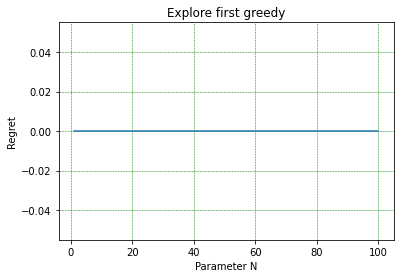

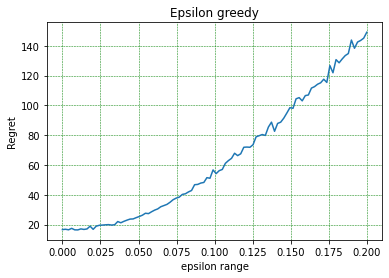

In [155]:
def main():

    #Repeat the algorithm to get average regret over 100 times
    Regret_greedy=np.zeros(100) #Regret initialization
    Regret_new_greedy=np.zeros(100) #Temp Regret initialization
    Regret_eps_greedy=np.zeros(100) #Regret initialization
    Regret_new_eps_greedy=np.zeros(100) #Temp Regret initialization
    Regret_ucb=np.zeros(100) #Regret initialization
    Regret_new_ucb=np.zeros(100) #Temp Regret initialization
    iterations=100 
    simulations=100
    E_parameter=np.arange(1,101) #Exploration parameter
    eps_parameter=np.linspace(0,0.2,100) #Range of Epsillon values
    confidence=np.linspace(0,2,100) #Range of Epsillon values

    i=0
    j=0
    
    #Run the simulation for 100 times for Greedy Algorithm
    while(j<simulations):
        while(i<iterations): 
            Regret_greedy[i]=greedy(10,1000,E_parameter[i])
            Regret_eps_greedy[i]=UCB(10,1000,confidence[i])
            Regret_ucb[i]=UCB(10,1000,confidence[i])
            i+=1
        i=0
        Regret_new_greedy=np.add(Regret_new_greedy,Regret_greedy) #Save all the regret to take average over 100 iterations
        Regret_new_eps_greedy=np.add(Regret_new_eps_greedy,Regret_eps_greedy) #Save all the regret to take average over 100 iterations   
        Regret_new_ucb=np.add(Regret_new_ucb,Regret_ucb) #Save all the regret to take average over 100 iterations  
        j+=1
    Regret_new_greedy=Regret_new_greedy/simulations
    Regret_new_eps_greedy=Regret_new_eps_greedy/simulations
    Regret_new_ucb=Regret_new_ucb/simulations
    #Regret_greedy=Regret_greedy/simulations


    #Plots of Greedy algorithm 
    plt.figure("Explore first greedy")
    plt.title("Explore first greedy")
    plt.plot(E_parameter,Regret_new_greedy) 
    plt.xlabel("Parameter N")
    plt.ylabel("Regret")
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

    #Plots of Epsilon Greedy algorithm 
    plt.figure("Epsilon greedy")
    plt.title("Epsilon greedy")
    plt.plot(eps_parameter,Regret_new_eps_greedy) 
    plt.xlabel("epsilon range")
    plt.ylabel("Regret")
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

    #Plots of Upper Confidence Bound 
    plt.figure("UCB")
    plt.title("Upper Confidence Bound")
    plt.plot(confidence,Regret_new_ucb) 
    plt.xlabel("Confidence levels")
    plt.ylabel("Regret")
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

if __name__ == '__main__':
    main()